In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [28]:
df = pd.read_csv("python-ml-course-master/datasets/auto/auto-mpg.csv")

In [29]:
df.head()
#MPG = millas por galon

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [31]:
df.shape

(406, 9)

In [18]:
#df["mpg"] = df["mpg"].dropna()
#df["horsepower"] = df["horsepower"].dropna()
#df = df.dropna()

In [23]:
df.shape

(392, 9)

Text(0.5,1,'Cavallos vs consumo')

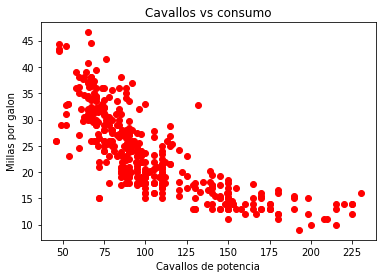

In [24]:
plt.plot(df["horsepower"],df["mpg"],"ro")
plt.xlabel("Cavallos de potencia")
plt.ylabel("Millas por galon")
plt.title("Cavallos vs consumo")

# No parece lineal, pero, intentaremos a ver que pasa

# Vamos con el modelo lineal
* mpg = a + b * horsepower

In [34]:
X = df[["horsepower"]].fillna(df["horsepower"].mean())
Y = df["mpg"].fillna(df["mpg"].mean())

In [35]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

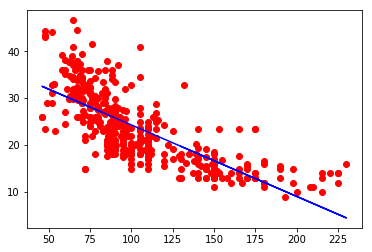

In [38]:
plt.plot(X,Y, "ro")
plt.plot(X,lm.predict(X),"b")

In [41]:
lm.score(X,Y)

0.574653340645025

In [46]:
SSD = np.sum( (Y - lm.predict(X)) ** 2)
RSE = np.sqrt( SSD / (len(X)-1))
y_mean = Y.mean()
error = RSE / y_mean

In [50]:
SSD, RSE, y_mean, error
# ~21%

(10315.75196006092, 5.046879480825511, 23.51457286432162, 0.21462773361633458)

# Vamos con un modelo cuadratico
* mpg = a + b * (horsepower ** 2)

In [52]:
X["horsepower2"] = X["horsepower"]**2

In [53]:
X.head()

,horsepower,horsepower2
0,130.0,16900.0
1,165.0,27225.0
2,150.0,22500.0
3,150.0,22500.0
4,140.0,19600.0


In [54]:
lm2 = LinearRegression()
lm2.fit(X[["horsepower2"]],Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

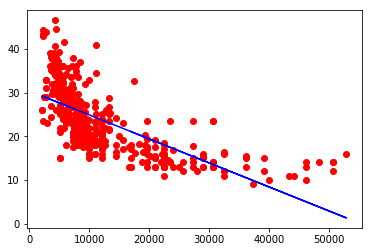

In [56]:
plt.plot(X[["horsepower2"]],Y, "ro")
plt.plot(X[["horsepower2"]],lm2.predict(X[["horsepower2"]]),"b")

In [58]:
lm2.score(X[["horsepower2"]],Y)

0.4849887034823205

In [63]:
SSD = np.sum( (Y - lm2.predict(X[["horsepower2"]])) ** 2)
RSE = np.sqrt( SSD / (len(X[["horsepower2"]])-1))
y_mean = Y.mean()
error = RSE / y_mean

In [64]:
SSD, RSE, y_mean, error
# Ahora el error es del 23%

(12490.350340501926, 5.553410772769817, 23.51457286432162, 0.236168898529981)

# una mierda!!!
# Ahora vamos a probar combinar los dos
mpg = a + b * horsepower + c * horsepower**2

In [69]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [70]:
poly = PolynomialFeatures(degree=2)

In [101]:
X_data = X["horsepower"]

In [117]:
X_data = poly.fit_transform(X[["horsepower"]])

In [120]:
X_data

array([[1.0000e+00, 1.3000e+02, 1.6900e+04],
       [1.0000e+00, 1.6500e+02, 2.7225e+04],
       [1.0000e+00, 1.5000e+02, 2.2500e+04],
       ...,
       [1.0000e+00, 8.4000e+01, 7.0560e+03],
       [1.0000e+00, 7.9000e+01, 6.2410e+03],
       [1.0000e+00, 8.2000e+01, 6.7240e+03]])

In [113]:
lm3 = linear_model.LinearRegression()

In [121]:
lm3.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [123]:
lm3.score(X_data,Y)

0.6439066584257469

In [125]:
SSD = np.sum( (Y - lm3.predict(X_data)) ** 2)
RSE = np.sqrt( SSD / (len(X_data)-1))
y_mean = Y.mean()
error = RSE / y_mean

In [126]:
SSD, RSE, y_mean, error
# Ahora el error es del 23%

(8636.180643524502, 4.61778115803654, 23.51457286432162, 0.1963795466190689)

In [127]:
lm3.coef_

array([ 0.        , -0.43404318,  0.00112615])

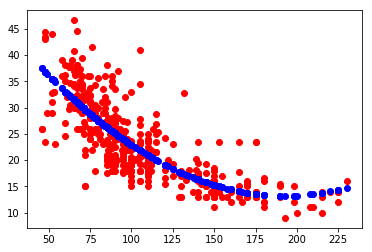

In [132]:
plt.plot(X[["horsepower"]],Y, "ro")
plt.plot(X[["horsepower"]],lm3.predict(X_data),"bo")

# Probamos con poly de distinto grado

In [139]:
for d in range(2,11):
    poly = PolynomialFeatures(degree=d)
    X_data = poly.fit_transform(X[["horsepower"]])
    lm3 = linear_model.LinearRegression()
    lm3.fit(X_data, Y)
    print("Regresion de grado: " + str(d))
    print(lm3.intercept_)
    print(lm3.score(X_data,Y))
    print(lm3.coef_)
    print(regression_validation(lm3,X_data,Y))
    print("-------------------------")

Regresion de grado: 2
55.02619244708036
0.6439066584257469
[ 0.         -0.43404318  0.00112615]
(8636.180643524502, 4.61778115803654, 23.51457286432162, 0.1963795466190689)
-------------------------
Regresion de grado: 3
58.44877411191831
0.6444678885560744
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
(8622.56936742855, 4.614140736300908, 23.51457286432162, 0.19622473106036675)
-------------------------
Regresion de grado: 4
40.09664385351243
0.6467674189704502
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]
(8566.799832491353, 4.5991947315797574, 23.51457286432162, 0.19558912501268777)
-------------------------
Regresion de grado: 5
-40.69384659973697
0.6547512491514693
[ 0.00000000e+00  4.00021432e+00 -7.54801920e-02  6.19621368e-04
 -2.36220932e-06  3.41983017e-09]
(8373.171388427545, 4.54692173402805, 23.51457286432162, 0.19336612067179157)
-------------------------
Regresion de grado: 6
-157.08543069325685
0.6572465394128946

In [138]:
def regression_validation(lm, X_data, Y):
    SSD = np.sum( (Y - lm.predict(X_data)) ** 2)
    RSE = np.sqrt( SSD / (len(X_data)-1))
    y_mean = Y.mean()
    error = RSE / y_mean
    return SSD, RSE, y_mean, error